In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
data.shape

(10000, 14)

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
data.value_counts('Geography')

Geography
France     5014
Germany    2509
Spain      2477
dtype: int64

In [11]:
data = data.drop('RowNumber', axis=1)

In [12]:
data.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [13]:
data.shape

(10000, 13)

## Exploratory Data Analysis (EDA)

### understanding the distribution of customers' credit scores and identify if there is a particular range where most customers fall

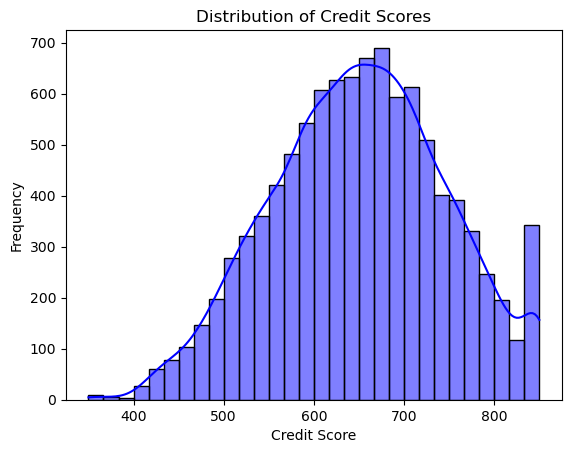

In [14]:
# Distribution of Credit Scores

sns.histplot(data['CreditScore'], kde=True, bins=30, color='blue')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

### examining the churn rate across different geographies and identify if customers from a particular region are more likely to churn.


/var/folders/z0/1lvzp4dd72db228qrnnqk0q80000gn/T/ipykernel_10572/1366692392.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Geography', y='Exited', data=data, estimator=lambda x: sum(x)/len(x)*100, ci=None, palette='viridis')


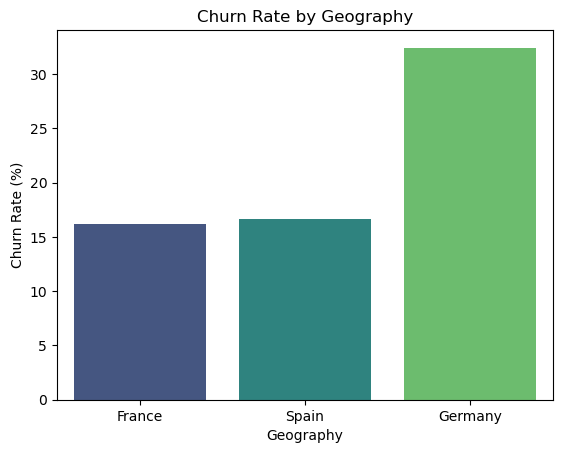

In [15]:
# Churn Rate by Geography

sns.barplot(x='Geography', y='Exited', data=data, estimator=lambda x: sum(x)/len(x)*100, ci=None, palette='viridis')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate (%)')
plt.show()

### gender-based difference in churn rates.

/var/folders/z0/1lvzp4dd72db228qrnnqk0q80000gn/T/ipykernel_10572/3417879588.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Exited', data=data, estimator=lambda x: sum(x)/len(x)*100, ci=None, palette='coolwarm')


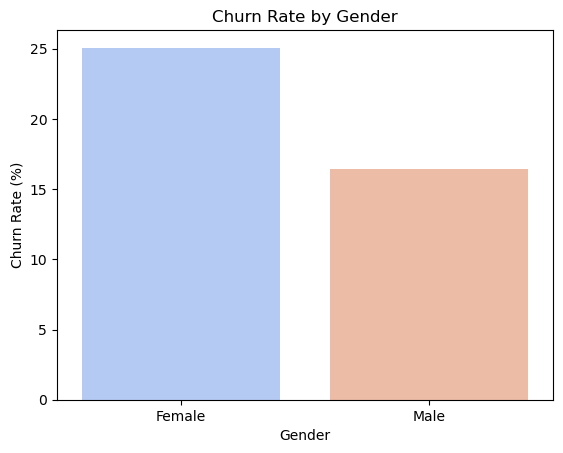

In [16]:
# Churn Rate by Gender

sns.barplot(x='Gender', y='Exited', data=data, estimator=lambda x: sum(x)/len(x)*100, ci=None, palette='coolwarm')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')
plt.show()

### age distribution of customers who churned versus those who didn't

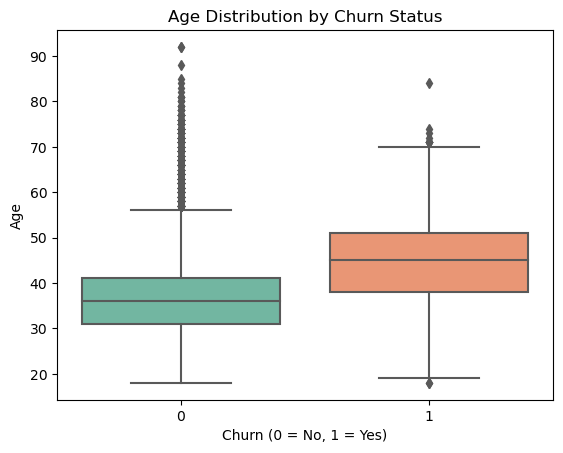

In [17]:
# Age Distribution by Churn Status

sns.boxplot(x='Exited', y='Age', data=data, palette='Set2')
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

### account balance influence on churn

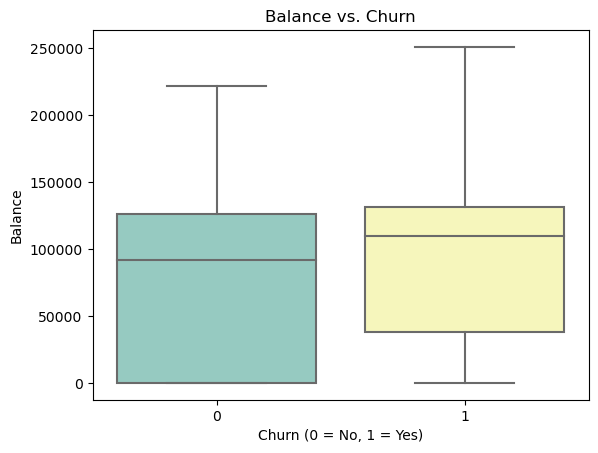

In [18]:
# Balance vs. Churn

sns.boxplot(x='Exited', y='Balance', data=data, palette='Set3')
plt.title('Balance vs. Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Balance')
plt.show()

### Correlation Matrix

/var/folders/z0/1lvzp4dd72db228qrnnqk0q80000gn/T/ipykernel_10572/2917438779.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


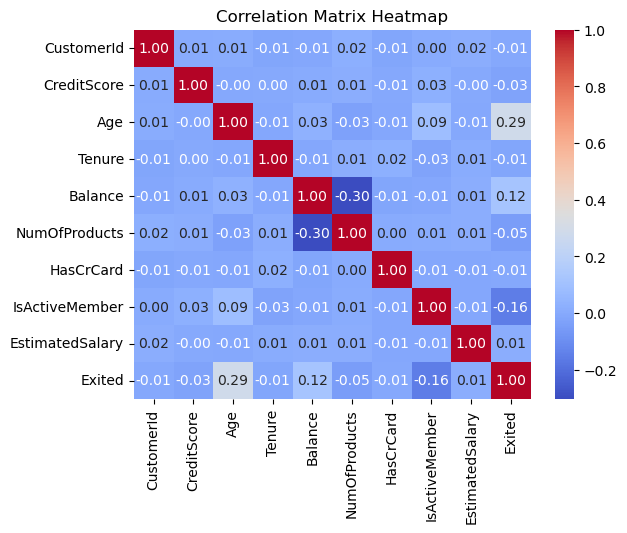

In [19]:
#  Heatmap

correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Churn Rate by Number of Products

/var/folders/z0/1lvzp4dd72db228qrnnqk0q80000gn/T/ipykernel_10572/1015508039.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='NumOfProducts', y='Exited', data=data, estimator=lambda x: sum(x)/len(x)*100, ci=None, palette='magma')


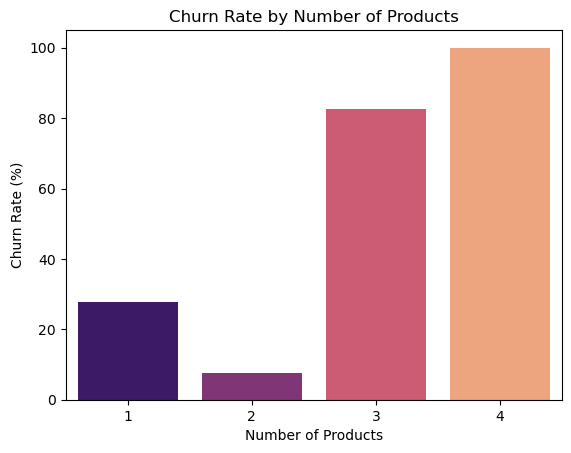

In [20]:
# Churn Rate by Number of Products
sns.barplot(x='NumOfProducts', y='Exited', data=data, estimator=lambda x: sum(x)/len(x)*100, ci=None, palette='magma')
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate (%)')
plt.show()

### Tenure vs Churn

/var/folders/z0/1lvzp4dd72db228qrnnqk0q80000gn/T/ipykernel_10572/1505726736.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Tenure', y='Exited', data=data, estimator=lambda x: sum(x)/len(x)*100, ci=None, palette='plasma')


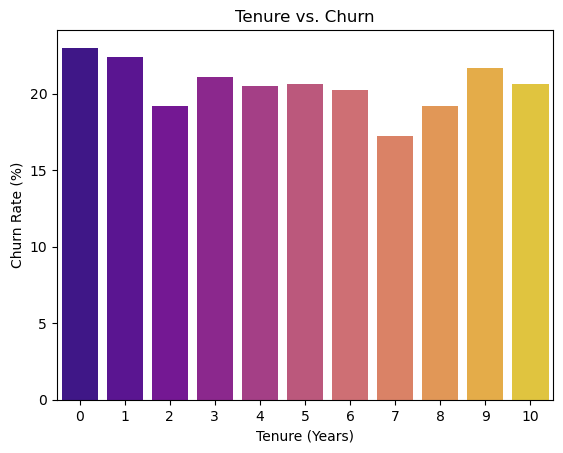

In [21]:
# Tenure vs. Churn

sns.barplot(x='Tenure', y='Exited', data=data, estimator=lambda x: sum(x)/len(x)*100, ci=None, palette='plasma')
plt.title('Tenure vs. Churn')
plt.xlabel('Tenure (Years)')
plt.ylabel('Churn Rate (%)')
plt.show()

## Data Preprocessing

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [23]:
# Define which columns are numerical and which are categorical
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender']

# Define the transformer for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale the features
])

# Define the transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode the categorical features
])

In [24]:
# Combine numerical and categorical transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [25]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Create pipelines for each model
pipelines = {name: Pipeline(steps=[('preprocessor', preprocessor), ('model', model)]) for name, model in models.items()}

In [26]:
# Assume `data` is your DataFrame and contains the relevant columns
# Split the data into features (X) and target (y)
X = data.drop('Exited', axis=1)  # Features
y = data['Exited']  # Target

# # Fit and transform the data using the preprocessor
# X_processed = preprocessor.fit_transform(X)


## ML

In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [28]:
# Dictionary to store the results
results = {}

for name, pipeline in pipelines.items():
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
    
    # Store the results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC Score': roc_auc
    }
    
    # Print the classification report for each model
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")



Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      2389
           1       0.54      0.12      0.20       611

    accuracy                           0.80      3000
   macro avg       0.68      0.55      0.54      3000
weighted avg       0.76      0.80      0.75      3000

Confusion Matrix:
[[2327   62]
 [ 537   74]]


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2389
           1       0.74      0.44      0.55       611

    accuracy                           0.85      3000
   macro avg       0.80      0.70      0.73      3000
weighted avg       0.84      0.85      0.84      3000

Confusion Matrix:
[[2294   95]
 [ 344  267]]


Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1      

In [29]:
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

# Select the best model based on ROC-AUC Score
best_model_name = results_df['ROC-AUC Score'].idxmax()
best_model = pipelines[best_model_name]

print(f"\nBest Performing Model: {best_model_name}")


                     Accuracy  Precision    Recall  F1 Score  ROC-AUC Score
Logistic Regression  0.800333   0.544118  0.121113  0.198126       0.764221
Random Forest        0.853667   0.737569  0.436989  0.548818       0.849088
Gradient Boosting    0.862667   0.786744  0.446809  0.569937       0.867235
SVM                  0.854000   0.807829  0.371522  0.508969       0.820154

Best Performing Model: Gradient Boosting


In [30]:
# Hyperparameter tuning for the best model (e.g., Random Forest)
param_grid = {}

if best_model_name == 'Random Forest':
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 4, 5]
    }
elif best_model_name == 'SVM':
    param_grid = {
        'model__C': [0.1, 1, 10],
        'model__gamma': [0.001, 0.01, 0.1]
    }
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear', 'lbfgs']
    }

# Initialize GridSearchCV
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='roc_auc')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation ROC-AUC Score: {best_score:.4f}")


Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
Best Cross-Validation ROC-AUC Score: 0.8441


In [31]:
# Final model training with best hyperparameters
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)

# Final evaluation on the test set
y_final_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_final_pred)
final_precision = precision_score(y_test, y_final_pred)
final_recall = recall_score(y_test, y_final_pred)
final_f1 = f1_score(y_test, y_final_pred)
final_roc_auc = roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1])

# Display final metrics
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final Precision: {final_precision:.4f}")
print(f"Final Recall: {final_recall:.4f}")
print(f"Final F1 Score: {final_f1:.4f}")
print(f"Final ROC-AUC Score: {final_roc_auc:.4f}")


Final Accuracy: 0.8627
Final Precision: 0.7867
Final Recall: 0.4468
Final F1 Score: 0.5699
Final ROC-AUC Score: 0.8672


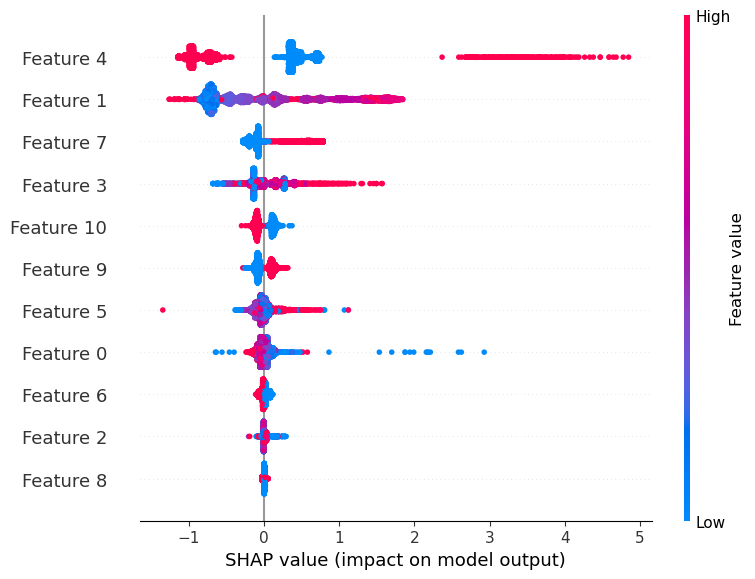

In [32]:
import shap

# Transform the training data using the preprocessor
X_train_transformed = preprocessor.transform(X_train)


# Initialize SHAP explainer and calculate SHAP values
explainer = shap.TreeExplainer(final_model['model'])

# Use the transformed data
shap_values = explainer.shap_values(X_train_transformed)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_train_transformed)

In [33]:
import joblib

joblib.dump(final_model, 'final_churn_model.pkl')


['final_churn_model.pkl']